# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="logo_uni.png" width="100" height="100/1.618">
<figure>

UNIVERSITÀ DEGLI STUDI DI TRENTO  
DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA  
A.A. 2022-2023
  
*Alunni:*  
Del Dò Giacomo, 221545  
Faccin Francesca, 222028  
Rossato Sofia, 218790

-------

# **Notebok 1: Creazione della griglia per WHERTGEO1D**

Si riporta il porcedimento seguito al fine di ottenere una griglia rappesentativa del pofilo di suolo di Vicenza (VI).  
I dati riguardanti la stratigrafia si sono ricavati dal Geoportale dell'ARPAV, si è scelto il punto individuato dalle coordinate: *lat45,56  long11,525*.  

Link al [Geoportale ARPAV](https://gaia.arpa.veneto.it/maps/778/view)  
Link per l'[unità tipologica di suolo](https://gaia.arpa.veneto.it/uploaded/suoli/UTS/LPL1.pdf)

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
from WHETGEO1D_GridCreator import*
from WHETGEO1D_toNetCDF import*

import warnings
warnings.filterwarnings('ignore')
####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,

        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

In [2]:
project_path

'/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/2_infiltrazione/OMS_Project_WHETGEO1D_23'

In [3]:
grid_input_file_name = project_path + "/data/Grid_input/ex00_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/ex00_ic.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'
dz_min = 0.01
dz_max = 0.05
b = 0.5

psi_interp_model = "linear"
T_interp_model = "linear"

water_ponding_0 = 0.20
T_water_ponding_0 = 273.15

# si definiscono i file di output
output_file_name =  project_path + "/data/Grid_NetCDF/ex00_grid_ponding.nc"
output_title = '''
'''
output_summary = '''
'''
output_date = ''
output_institution = 'GEOframe'

## **Creazione della griglia**

In [4]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()
#salvo il file che descrive la griglia per poterlo richiamare nel 'Notebook2_WHETGEO1D_Vicenza'
data_grid.to_pickle("data_grid")

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta   K  equationStateID  parameterID
0    L -0.0  70              1.0          4.0
1    L -0.4  60              1.0          5.0
2    L -0.9  30              1.0          3.0
3    L -1.2   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0   0.2  273.15
1 -0.9  -0.6  273.15
2 -1.2  -3.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1

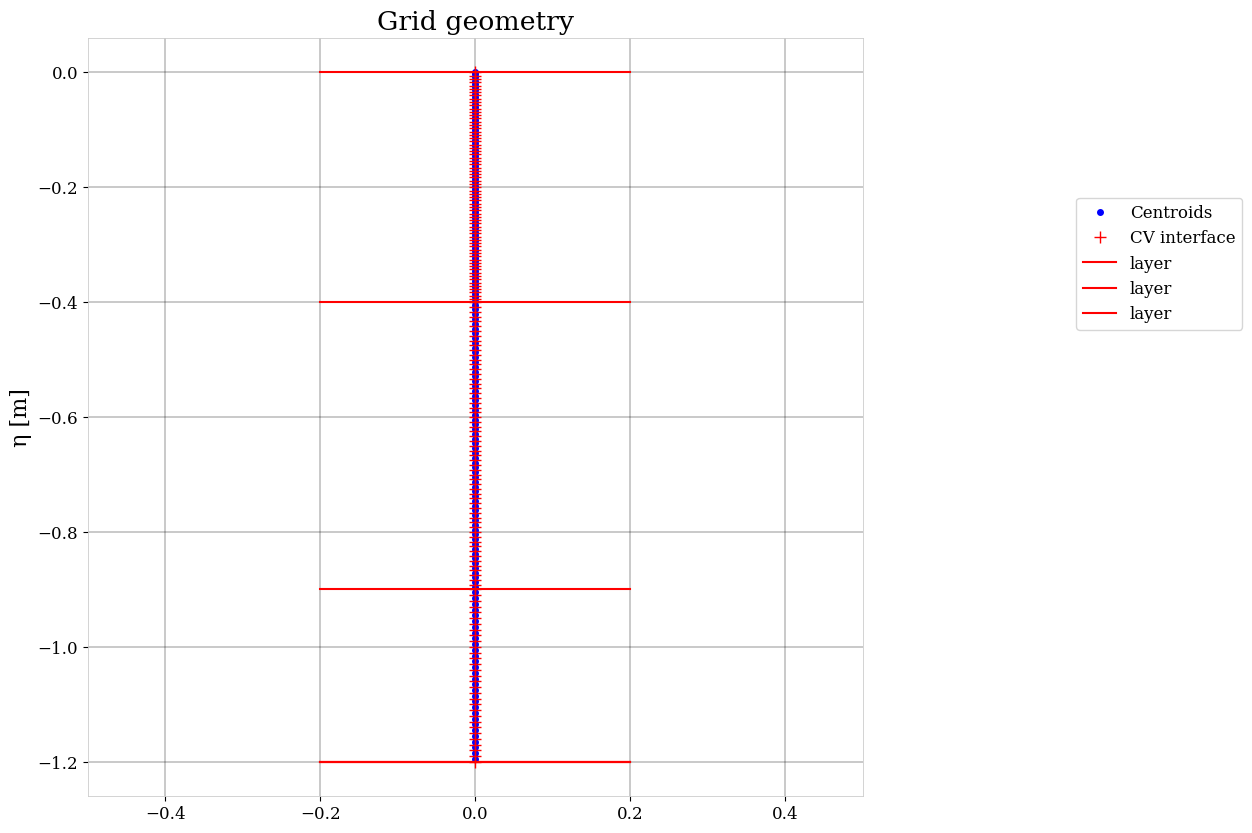

In [5]:
showMesh(data_grid)
# salvo l'immagine della griglia per poterla usare nel 'Notebook2_WHETGEO1D_Vicenza'
plt.savefig("ex00_grid.png")

## **Condizioni iniziali**

In [6]:
import xarray as xr
import matplotlib.style as style 
style.available
style.use('seaborn-whitegrid')
nice_fonts = {
        "legend.frameon": True,"legend.fancybox": True,"legend.facecolor": "white","axes.edgecolor": "0.8","axes.linewidth": 0.6,"grid.linewidth":0.4,
        "text.usetex": True,"font.family": "serif","axes.labelsize": 16,"font.size": 16,"legend.fontsize": 14,"xtick.labelsize": 14,"ytick.labelsize": 14,}
plt.rcParams.update(nice_fonts)

In [7]:
ds = xr.open_dataset(project_path + '/data/Grid_NetCDF/ex00_grid_ponding.nc')
ds

<xarray.Dataset>
Dimensions:               (scalar: 1, z: 161, z_dual: 161, space_delta: 162, control_volume_index: 1, parameter: 12)
Coordinates:
  * z                     (z) float64 0.005 0.015 0.025 ... 1.191 1.197 1.2
Dimensions without coordinates: scalar, z_dual, space_delta, control_volume_index, parameter
Data variables: (12/21)
    KMAX                  (scalar) int32 ...
    eta                   (z) float64 ...
    etaDual               (z_dual) float64 ...
    zDual                 (z_dual) float64 ...
    psi0                  (z) float64 ...
    T0                    (z) float64 ...
    ...                    ...
    par3SWRC              (parameter) float64 ...
    par4SWRC              (parameter) float64 ...
    par5SWRC              (parameter) float64 ...
    alphaSpecificStorage  (parameter) float64 ...
    betaSpecificStorage   (parameter) float64 ...
    ks                    (parameter) float64 ...
Attributes:
    title:         \n\ngrid input file/Users/francescafaccin/Desktop/idrologi...
    institution:   GEOframe
    summary:       \n
    date_created:

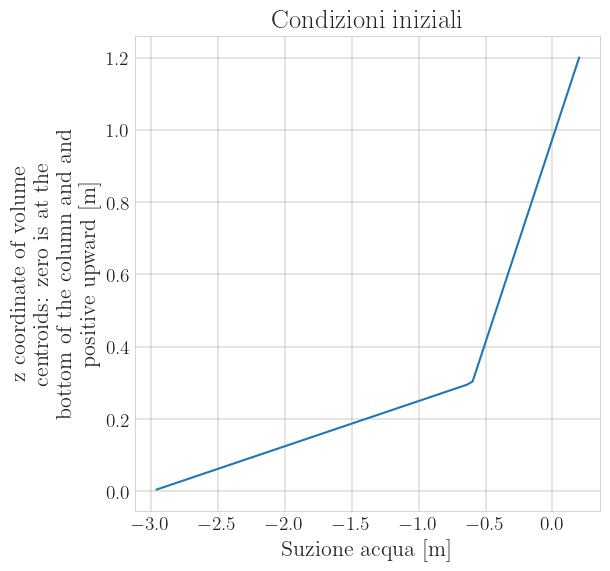

In [8]:
fig = plt.figure(figsize=(6,10/1.62))
ds.psi0.plot(y='z')
plt.xlabel('Suzione acqua [m]')
plt.title('Condizioni iniziali')
plt.grid(color='grey', linestyle='-', linewidth=0.3)